In [6]:
import numpy as np
import pandas as pd
from sklearn import tree
from package import function
import shap
%matplotlib inline
from package import DT
from sklearn.tree import DecisionTreeClassifier

In [7]:
Xtrain = pd.read_csv("Xtrain_featured.csv")
ytrain = pd.read_csv("ytrain_featured.csv").cardio
Xtest = pd.read_csv("Xtest_featured.csv")
ytest = pd.read_csv("ytest_featured.csv").cardio

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Set the model with params: {'criterion': 'entropy', 'max_depth': 6}
The score is 0.725952 for DTF


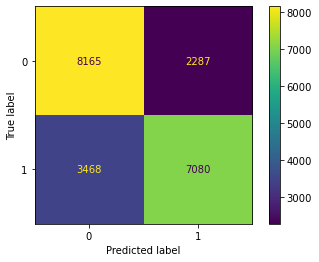

In [8]:
model = DT.DecisionTree()
model.baseline()
model.best_model(Xtrain,ytrain)
model.fit(Xtrain,ytrain)
ypr,probTest = model.predict(Xtest)
function.eval_confusion("DTF",ypr,ytest)

In [9]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,random_state = 100)
model.fit(Xtrain,ytrain)
importance = model.feature_importances_

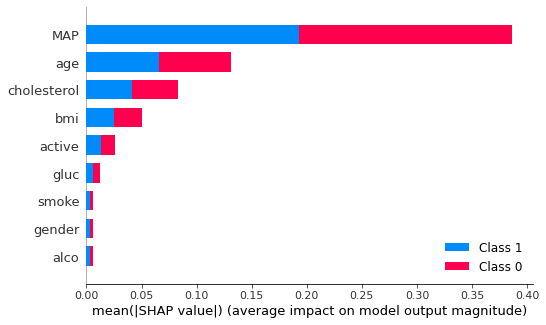

In [10]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, plot_type="bar")